## Problem 1

In [10]:
N = 10
A = zeros(N,N)
for i in 1:N, j in 1:N
    abs(i-j)<=1 ? A[i,j]+=1 : nothing
    i==j ? A[i,j]-=3 : nothing
end
A

10×10 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [17]:
#### Prepare Data

X = rand(1000, 3)               # feature matrix
a0 = rand(3)                    # ground truths
y = X * a0 + 0.1 * randn(1000);  # generate response

1000-element Array{Float64,1}:
  0.245515 
  0.213645 
  0.179037 
 -0.0252645
  0.327495 
  0.1073   
  0.284771 
  0.134653 
  0.32761  
  0.139108 
  0.321555 
  0.192148 
  0.124061 
  ⋮        
  0.173127 
  0.203367 
  0.183517 
  0.107017 
  0.290129 
  0.203007 
  0.261345 
  0.205973 
  0.194457 
  0.0825708
  0.180052 
  0.0156171

## Problem 2

In [18]:
X2 = hcat(X,ones(1000))
println(X2\y)

[0.219939,0.0336012,0.090267,0.00117261]


## Problem 3

In [19]:
using MultivariateStats
llsq(X,y)

4-element Array{Float64,1}:
 0.219939  
 0.0336012 
 0.090267  
 0.00117261

## Problem 4

In [20]:
using DataFrames, GLM
data = DataFrame(X1=X[:,1], X2=X[:,2], X3=X[:,3],Y=y)
OLS = lm(Y ~ X1 + X2 + X3, data)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: Y ~ 1 + X1 + X2 + X3

Coefficients:
               Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.00117261  0.010462 0.112083   0.9108
X1             0.219939 0.0113648  19.3526   <1e-70
X2            0.0336012 0.0111465  3.01451   0.0026
X3             0.090267 0.0108559    8.315   <1e-15


## Problem 5


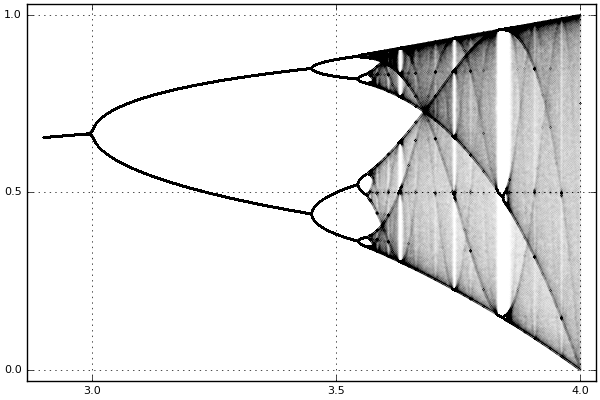

In [21]:
r = 2.9:.00005:4; numAttract = 150
steady = ones(length(r),1)*.25
for i=1:400 ## Get to steady state
  steady .= r.*steady.*(1-steady)
end
x = zeros(length(steady),numAttract)
x[:,1] = steady
@inbounds for i=2:numAttract ## Grab values at the attractor
  x[:,i] = r.*x[:,i-1].*(1-x[:,i-1])
end
using Plots
plot(collect(r),x,seriestype=:scatter,markersize=.002,legend=false)

## Metaprogramming Project

In [1]:
macro ~(y,ex)
  new_ex = Meta.quot(ex)
  quote
    inner_ex = $(esc(new_ex))
    data_name = Symbol(string(inner_ex.args[end])[1])
    eval_ex = Expr(:(=),:data,data_name)
    eval(Main,eval_ex)
    new_X = Matrix{Float64}(size(data,1),length(inner_ex.args)-1)
    cur_spot = 0
    for i in 2:length(inner_ex.args)
      if inner_ex.args[i] == 1
        new_X[:,i-1] = ones(size(data,1))
      else
        col = parse(Int,string(string(inner_ex.args[i])[2]))
        new_X[:,i-1] = data[:,col]
      end
    end
    $(esc(y)),new_X
  end
end

y = rand(10)
X = rand(10,4)
y~1+X1+X2+X4

function solve_least_squares(y,X)
  X\y
end
solve_least_squares(tup::Tuple) = solve_least_squares(tup...)
solve_least_squares(y~1+X1+X2+X4)

4-element Array{Float64,1}:
  0.153788
  0.742984
 -0.268836
  0.320996

## Distribution Dispatch Problem

This is from Josh Day's talk: https://www.youtube.com/watch?v=EwcTNzpQ6Sc

Solution is from: https://github.com/joshday/Talks/blob/master/SLG2016_IntroToJulia/Slides.ipynb

In [ ]:
function myquantile(d::UnivariateDistribution, q::Number)
    θ = mean(d)
    tol = Inf
    while tol > 1e-5
        θold = θ
        θ = θ - (cdf(d, θ) - q) / pdf(d, θ)
        tol = abs(θold - θ)
    end
    θ
end

for dist in [Gamma(5, 1), Normal(0, 1), Beta(2, 4)]
    @show myquantile(dist, .75)
    @show quantile(dist, .75)
    println()
end

## LightGraphs Problem

In [ ]:
using LightGraphs, Distributions
function mkTree(maxdepth::Int = 10, p::Float64 = 0.8, g::SimpleGraph = Graph(1), currhead::Int = 1)
    if (maxdepth <= 1) g
    else
       b = Binomial(2, p)
       nEdges = max(1, rand(b))
        for leaves in 1:nEdges
            add_vertex!(g)
            newnode = nv(g)
            add_edge!(g, currhead, newnode)
            mkTree(maxdepth-1, p, g, newnode)
        end
    end
    g
end

## Roots Problems

In [ ]:
using Roots
f(x) = 10 - x + e*sin(x)
fzero(f,BigFloat(2.0))

In [ ]:
f! = function (x,dx)
  dx[1] = x[1]   + x[2]   + x[3]^2 -12
  dx[2] = x[1]^2 - x[2]   + x[3]   - 2
  dx[3] = 2x[1]  - x[2]^2 + x[3]   - 1
end
using NLsolve
res = nlsolve(f!,[1.0;1.0;1.0])
res.zero
res = nlsolve(f!,[1.0;1.0;1.0],autodiff=true)
res.zero